<a href="https://colab.research.google.com/github/Junaid-Sk-30/Projects/blob/main/4_Personlized_Health_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# First upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

Saving blood.csv to blood.csv


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('blood.csv')

# Display descriptive statistics
print(data.describe())

          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


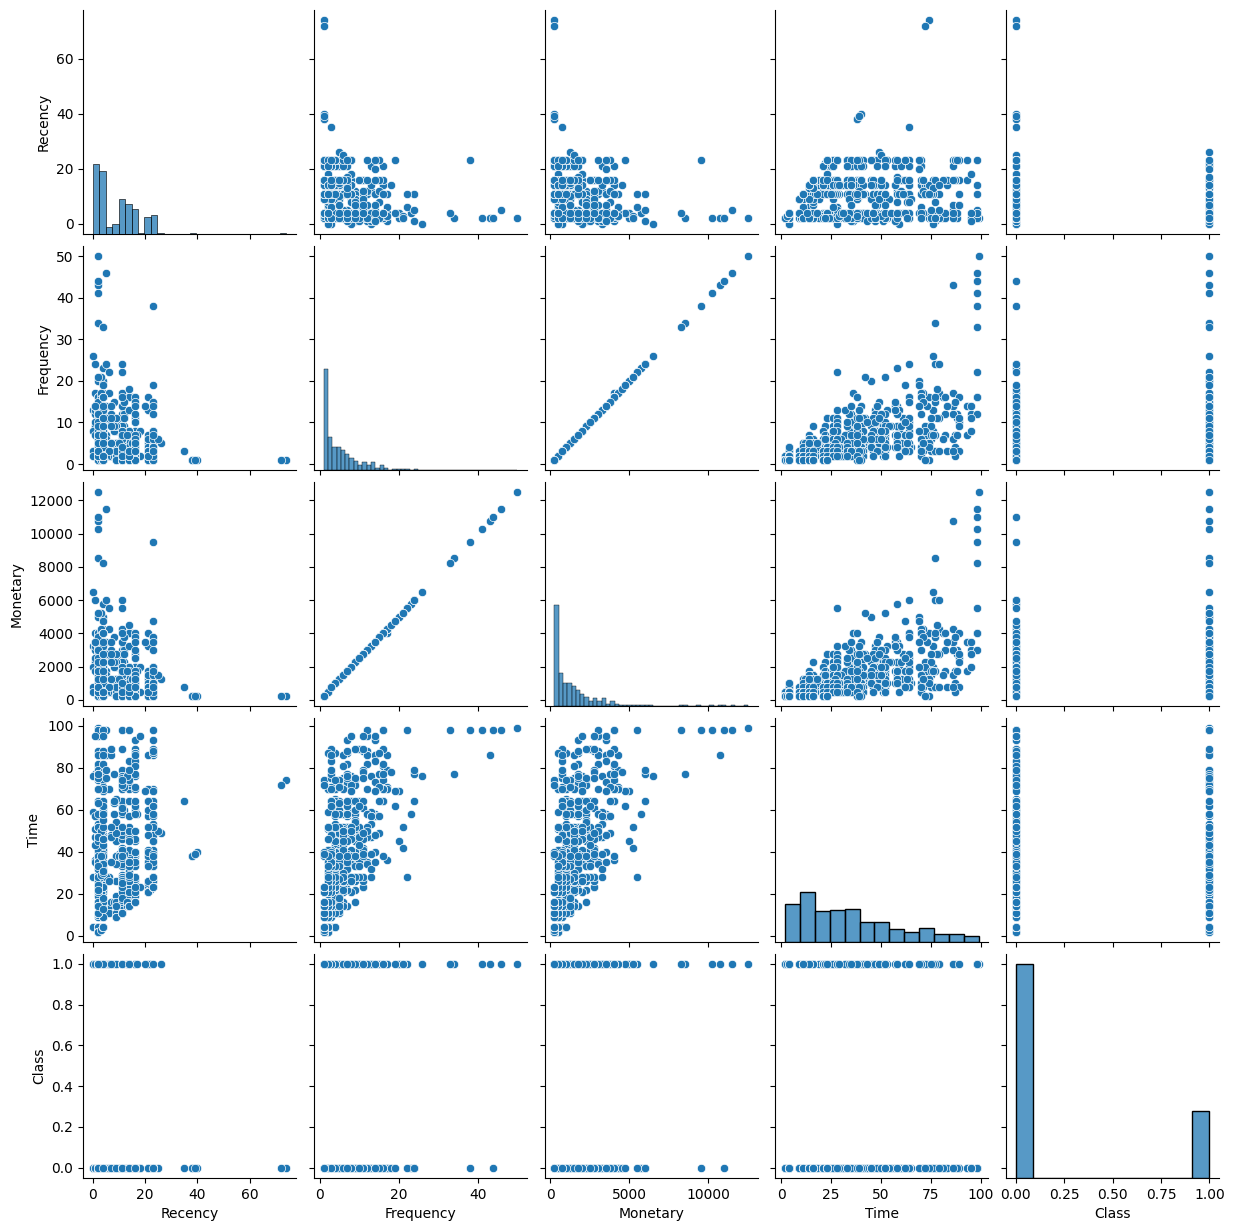

In [ ]:
# Visualize distributions
sns.pairplot(data)
plt.show()

In [ ]:
# Explore the dataset
print(data.head())
print(data.describe())

   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Handle missing values (example: fill with mean)
data.fillna(data.mean(), inplace=True)

# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split the dataset
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

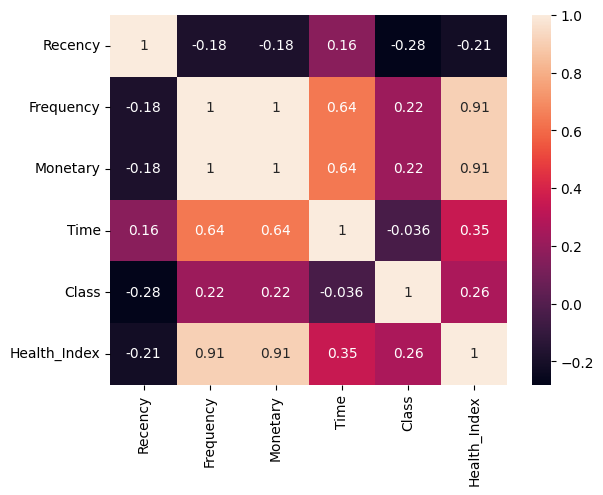

In [ ]:
# Example of creating a new feature
data['Health_Index'] = (data['Monetary'] / data['Time']) * data['Frequency']

# Feature selection (example: using correlation)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression()

# Train models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression()

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150



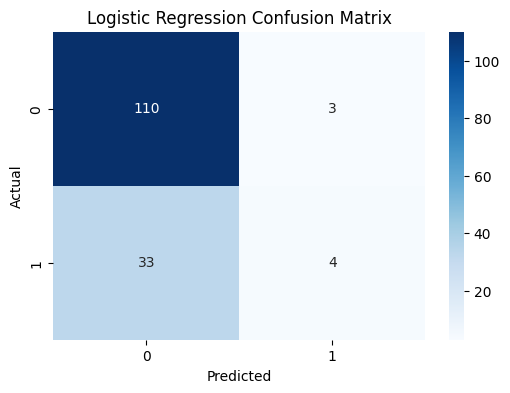

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       113
           1       0.28      0.22      0.24        37

    accuracy                           0.67       150
   macro avg       0.52      0.52      0.51       150
weighted avg       0.64      0.67      0.65       150



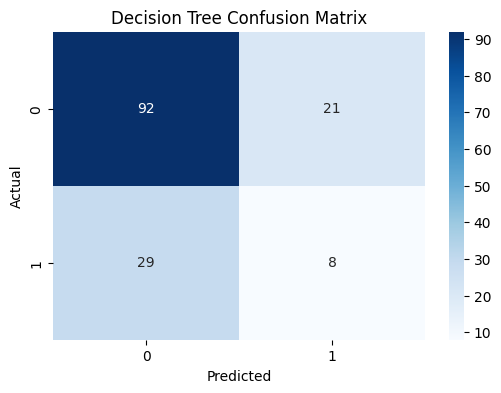

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150



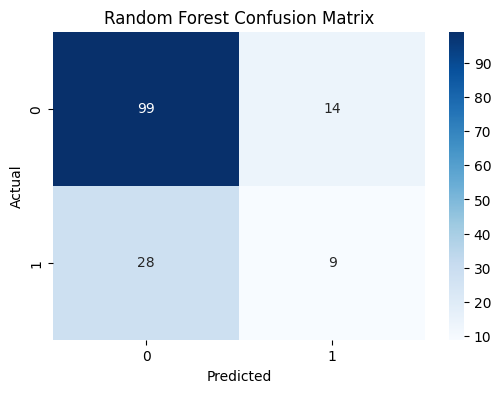

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86       113
           1       0.62      0.22      0.32        37

    accuracy                           0.77       150
   macro avg       0.70      0.59      0.59       150
weighted avg       0.75      0.77      0.73       150



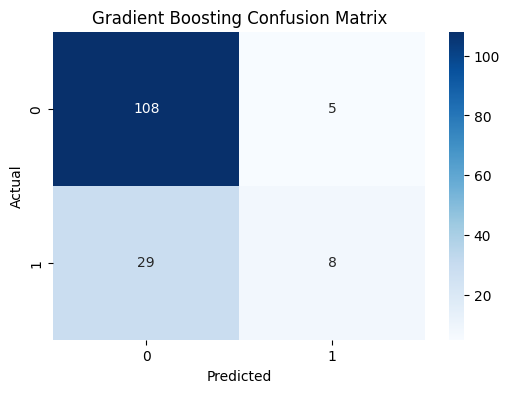

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       113
           1       1.00      0.03      0.05        37

    accuracy                           0.76       150
   macro avg       0.88      0.51      0.46       150
weighted avg       0.82      0.76      0.66       150



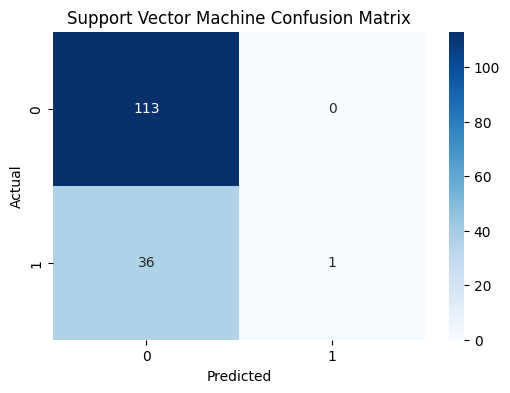

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.86       113
           1       0.50      0.08      0.14        37

    accuracy                           0.75       150
   macro avg       0.63      0.53      0.50       150
weighted avg       0.70      0.75      0.68       150



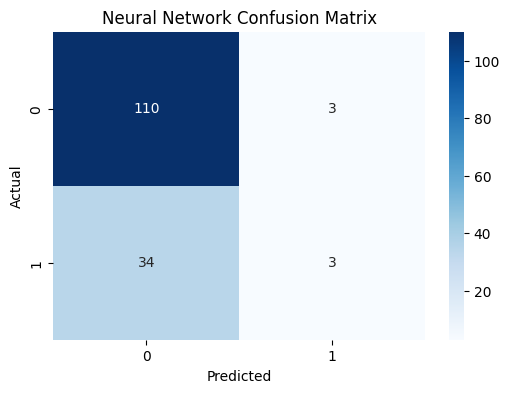

In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Model Selection and Training
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()